<a href="https://colab.research.google.com/github/fajni/DWKD-SPOZ/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plot
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/fajni/DWKD-SPOZ/main/Data/MasinskoUcenjeProfit.csv").head(500)
df['Sales'] = df['UnitPrice'] * df['OrderQuantity'] * np.where(df['Discount'] == 0, 1, df['Discount'])
df['Profit'] = df['Profit'] - df['Sales']
df

,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales
0,High,10,0.10,6,32,5,0.68,87.16,19.20
1,Not Specified,0,0.08,96,2,35,0.50,30.28,15.36
2,Critical,15,0.06,41,3,3,0.36,26.52,7.38
3,Low,5,0.00,292,4,49,0.56,-562.92,1168.00
4,Low,5,0.07,101,43,45,0.69,2343.65,304.01
...,...,...,...,...,...,...,...,...,...
495,Critical,15,0.05,4,1,5,0.08,-5.08,0.20
496,Not Specified,0,0.02,201,45,56,0.75,6365.95,180.90
497,Not Specified,0,0.02,4,24,5,0.40,29.56,1.92
498,Not Specified,0,0.04,86,19,1,0.85,1257.18,65.36


Text(0, 0.5, 'Profit')

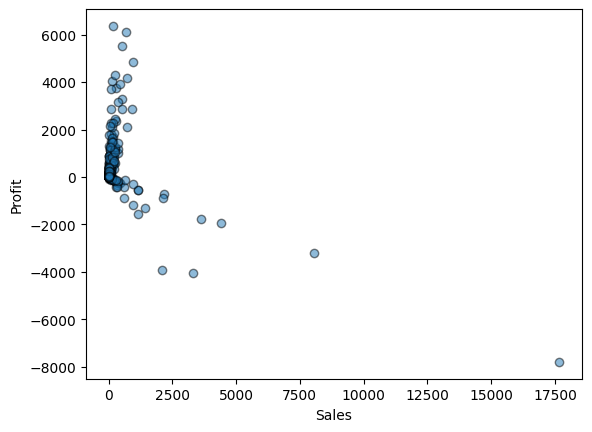

In [73]:
plot.scatter(df.Sales, df['Profit'], alpha=0.5, edgecolors='black') # isto je df.Profit ili df['Profit']
plot.xlabel('Sales')
plot.ylabel('Profit')

In [78]:
km = KMeans(n_clusters=6)
km

KMeans(n_clusters=6)

In [79]:
y_predicted = km.fit_predict(df[['Sales', 'Profit']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 5, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 5, 0, 3, 3,
       3, 2, 5, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3,

In [80]:
df['Cluster'] = y_predicted
df

,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Cluster
0,High,10,0.10,6,32,5,0.68,87.16,19.20,3
1,Not Specified,0,0.08,96,2,35,0.50,30.28,15.36,3
2,Critical,15,0.06,41,3,3,0.36,26.52,7.38,3
3,Low,5,0.00,292,4,49,0.56,-562.92,1168.00,3
4,Low,5,0.07,101,43,45,0.69,2343.65,304.01,0
...,...,...,...,...,...,...,...,...,...,...
495,Critical,15,0.05,4,1,5,0.08,-5.08,0.20,3
496,Not Specified,0,0.02,201,45,56,0.75,6365.95,180.90,2
497,Not Specified,0,0.02,4,24,5,0.40,29.56,1.92,3
498,Not Specified,0,0.04,86,19,1,0.85,1257.18,65.36,0


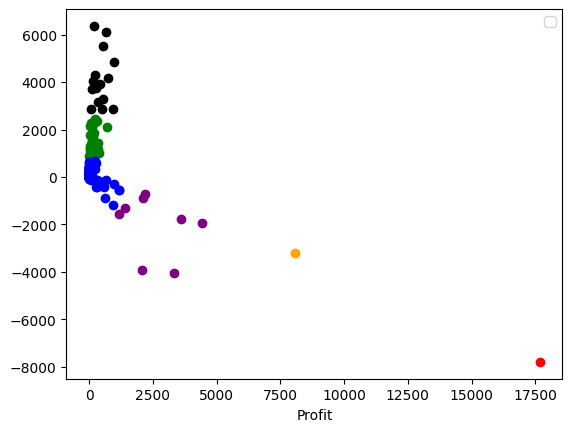

In [81]:
# Svaki cluster pripada svom data frame - u
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
df3 = df[df.Cluster == 3]
df4 = df[df.Cluster == 4]
df5 = df[df.Cluster == 5]

plot.scatter(df0.Sales, df0.Profit, color='green')
plot.scatter(df1.Sales, df1.Profit, color='red')
plot.scatter(df2.Sales, df2.Profit, color='black')
plot.scatter(df3.Sales, df3.Profit, color='blue')
plot.scatter(df4.Sales, df4.Profit, color='orange')
plot.scatter(df5.Sales, df5.Profit, color='purple')

plot.xlabel('Sales')
plot.xlabel('Profit')
plot.legend()